In [129]:
import datetime
import json
import pandas as pd
import matplotlib.pyplot as plt
import scipy


In [140]:
# RESULT_DIR = "./curated_experiments/energy_entropy_trend_in_n/1htanh_h4_20230401/"
# RESULT_DIR = "./curated_experiments/energy_entropy_trend_in_n/1htanh_h4_narrowband_20230402/"
RESULT_DIR = "./curated_experiments/energy_entropy_trend_in_n/1htanh_h3_in2_20230402/"
with open(f"{RESULT_DIR}/all_result.json") as infile:
    all_result = json.load(infile)
print(f"Num experiments: {len(all_result)}")

rec = []
for x in all_result:
    rec.append([
        x["rng_seed"], 
        x["itemp"], 
        x["num_training_data"], 
        x["output"]["enll"], 
        x["output"]["wall_time_taken"]
    ])
df_result = pd.DataFrame(rec, columns=["rng_seed", "itemp", "num_training_data", "enll", "time_taken"])

df_result

Num experiments: 600


,rng_seed,itemp,num_training_data,enll,time_taken
0,43,0.085024,8000,-6967.129395,2698.914729
1,46,0.123099,5000,-4325.077637,1701.820183
2,47,0.114978,9000,-7930.837402,3155.179836
3,48,0.103514,10000,-8915.504883,3805.868481
4,42,0.131484,6000,-5281.912109,2245.437065
...,...,...,...,...,...
595,41,0.113633,10000,-8802.046875,3833.602544
596,46,0.107579,7000,-6135.030762,2512.191324
597,42,0.086106,7000,-6092.358887,2255.421834
598,47,0.127016,8000,-7057.861328,2993.062099


Max time taken. 88.81 minutes


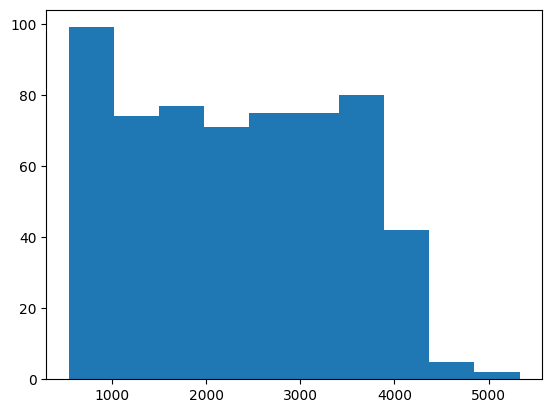

In [141]:
print(f"Max time taken. {df_result['time_taken'].max() / 60:.2f} minutes")
plt.hist(df_result["time_taken"]);

In [146]:
g = df_result.groupby(["rng_seed", "num_training_data"])
rec = []
for (seed, n), df in g:
    itemps = df["itemp"]
    enlls = df["enll"]
    slope, intercept, r_val, _, _ = scipy.stats.linregress(1 / itemps, enlls)
    rec.append([seed, n, slope, intercept / n, r_val**2])
    
ESTLAMBDA_KEY = "$\hat{\lambda}$"
ESTENERGY_KEY = "$\hat{L_n}(w_0)$"
RSQUARED_KEY = "$R^2$"
df_estimates = pd.DataFrame(rec, columns=["rng_seed", "num_training_data", ESTLAMBDA_KEY, ESTENERGY_KEY, RSQUARED_KEY])

min_rsquared = df_estimates["$R^2$"].min()
print(f"Min $R^2$: {min_rsquared:.4f}")
df_estimates

Min $R^2$: 0.9944


,rng_seed,num_training_data,$\hat{\lambda}$,$\hat{L_n}(w_0)$,$R^2$
0,40,2000,4.280973,-0.891699,0.998687
1,40,3000,4.859299,-0.907580,0.994363
2,40,4000,4.772804,-0.899204,0.999390
3,40,5000,4.652996,-0.899114,0.999116
4,40,6000,4.781586,-0.882805,0.999794
...,...,...,...,...,...
95,49,7000,4.667827,-0.881395,0.999848
96,49,8000,4.409638,-0.884610,0.999104
97,49,9000,4.350569,-0.891051,0.999502
98,49,10000,4.217643,-0.888676,0.999735


,num_training_data,$\hat{\lambda}$,$\hat{L_n}(w_0)$,$R^2$
0,2000,4.177643,-0.880900,0.998608
1,3000,4.711126,-0.887870,0.997611
2,4000,4.678470,-0.885128,0.998655
3,5000,4.718418,-0.880782,0.999143
4,6000,4.644944,-0.885989,0.999210
5,7000,4.516119,-0.880919,0.999534
6,8000,4.457253,-0.880097,0.999283
7,9000,4.411500,-0.885876,0.999286
8,10000,4.287451,-0.889091,0.999570
9,11000,4.344166,-0.882891,0.999546


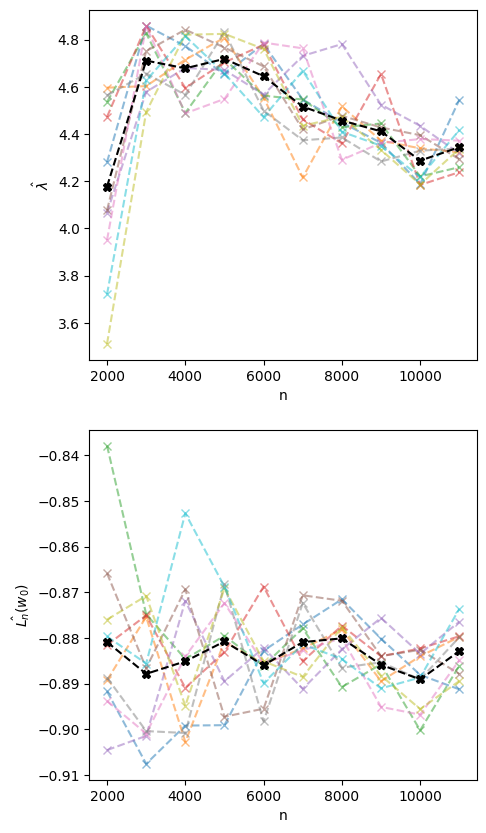

In [147]:
fig, axes = plt.subplots(2, 1, figsize=(5, 10))

for seed, df in df_estimates.groupby("rng_seed"):
    nums = df["num_training_data"]
    lmbdas = df[ESTLAMBDA_KEY]
    energies = df[ESTENERGY_KEY]
    ax = axes[0]
    ax.plot(nums, lmbdas, "x--", alpha=0.5)
    ax.set_xlabel("n")
    ax.set_ylabel(ESTLAMBDA_KEY)
#     ax.set_xscale("log")

    ax = axes[1]
    ax.plot(nums, energies, "x--", alpha=0.5)
    ax.set_xlabel("n")
    ax.set_ylabel(ESTENERGY_KEY);

    
df = df_estimates.groupby("num_training_data").agg("mean")
nums = df.index
lmbdas = df[ESTLAMBDA_KEY]
energies = df[ESTENERGY_KEY]
ax = axes[0]
ax.plot(nums, lmbdas, "kX--")
ax.set_xlabel("n")
ax.set_ylabel(ESTLAMBDA_KEY)
#     ax.set_xscale("log")

ax = axes[1]
ax.plot(nums, energies, "kX--")
ax.set_xlabel("n")
ax.set_ylabel("$\hat{L_n}(w_0)$");


df.drop("rng_seed", axis=1).reset_index()

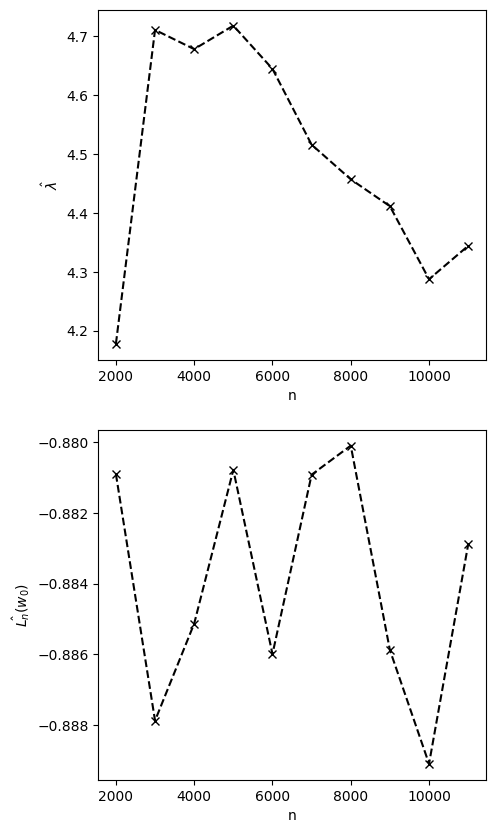

In [144]:
df = df_estimates.groupby("num_training_data").agg("mean")
fig, axes = plt.subplots(2, 1, figsize=(5, 10))

nums = df.index
lmbdas = df[ESTLAMBDA_KEY]
energies = df[ESTENERGY_KEY]
ax = axes[0]
ax.plot(nums, lmbdas, "kx--")
ax.set_xlabel("n")
ax.set_ylabel("$\hat{\lambda}$")
#     ax.set_xscale("log")

ax = axes[1]
ax.plot(nums, energies, "kx--")
ax.set_xlabel("n")
ax.set_ylabel("$\hat{L_n}(w_0)$");
